In [111]:
import my_utils as mu
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [19]:
tier = 'GOLD'

In [20]:
mu.db_open()

Oracle Open!


In [21]:
for i in range(70) :
    raw_data = mu.get_rawdata(tier)
    df = mu.get_match_timeline_df(raw_data)
    tqdm.pandas()
    df.progress_apply(lambda x : mu.insert(x), axis = 1)

  0%|          | 0/12 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
mu.oracle_close()

In [ ]:
mu.db_open()
df = mu.oracle_execute('SELECT * FROM LOL_PROJ')
mu.oracle_close()

In [ ]:
print(df)

In [ ]:
my_df = df[df.GAMEID == '6394368333']

In [ ]:
my_df

In [30]:
my_df.columns

Index(['GAMEID', 'GAMEDURATION', 'GAMEVERSION', 'SUMMONERNAME',
       'SUMMONERLEVEL', 'PARTICIPANTID', 'CHAMPIONNAME', 'CHAMPEXPERIENCE',
       'TEAMPOSITION', 'TEAMID', 'WIN', 'KILLS', 'DEATHS', 'ASSISTS',
       'TOTALDAMAGEDEALTTOCHAMPIONS', 'TOTALDAMAGETAKEN', 'G5', 'G6', 'G7',
       'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17',
       'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25'],
      dtype='object')

In [ ]:
blue_team = my_df[my_df.TEAMID == 100]
red_team = my_df[my_df.TEAMID == 200]
#gameid, summonerName, championName, teamposition, teamid, win, kills, deaths, assists, g_14

In [41]:
blue_team = blue_team[['GAMEID', 'SUMMONERNAME', 'CHAMPIONNAME',
       'TEAMPOSITION', 'TEAMID', 'WIN', 'KILLS', 'DEATHS', 'ASSISTS', 'G14']]

In [42]:
blue_team

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G14
500,6394368333,free from desire,Aatrox,TOP,100,True,4,4,2,5732
501,6394368333,반포동박캔디디,JarvanIV,JUNGLE,100,True,7,3,6,4964
502,6394368333,암흑전사초딩,Viktor,MIDDLE,100,True,5,7,3,4336
503,6394368333,통통벌,Xayah,BOTTOM,100,True,3,2,6,5166
504,6394368333,송누식,Lulu,UTILITY,100,True,2,0,10,3748


In [43]:
red_team = red_team[['GAMEID', 'SUMMONERNAME', 'CHAMPIONNAME',
       'TEAMPOSITION', 'TEAMID', 'WIN', 'KILLS', 'DEATHS', 'ASSISTS', 'G14']]

In [44]:
red_team

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G14
0,6394368333,명치개때리고싶다,Hecarim,JUNGLE,200,False,4,6,5,4848
1,6394368333,보건진료소장,Leblanc,MIDDLE,200,False,1,3,8,3976
2,6394368333,이겨보고싶어요,Sivir,BOTTOM,200,False,2,4,3,3378
3,6394368333,담비전용원딜,Belveth,UTILITY,200,False,6,4,1,4404
505,6394368333,박제리,Anivia,TOP,200,False,3,4,3,4046


In [50]:
# red_team.drop(columns = ['TEAMID', 'WIN']).rename(columns = {'SUMMONERNAME' : 'red_SUMMONERNAME', 'CHAMPIONNAME' : 'red_CHAMPIONNAME', 'KILLS' : 'red_KILLS', 'DEATHS' : 'red_DEATHS', 'ASSISTS' : 'red_ASSISTS', 'G14' : 'red_G14'})
red_team = red_team.rename(columns = {'SUMMONERNAME' : 'red_SUMMONERNAME', 'CHAMPIONNAME' : 'red_CHAMPIONNAME', 'KILLS' : 'red_KILLS', 'DEATHS' : 'red_DEATHS', 'ASSISTS' : 'red_ASSISTS', 'G14' : 'red_G14'})

In [51]:
red_team.columns

Index(['GAMEID', 'red_SUMMONERNAME', 'red_CHAMPIONNAME', 'TEAMPOSITION',
       'red_KILLS', 'red_DEATHS', 'red_ASSISTS', 'red_G14'],
      dtype='object')

In [52]:
blue_team.sort_values(by = ['G14'], ascending = False)

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G14
500,6394368333,free from desire,Aatrox,TOP,100,True,4,4,2,5732
503,6394368333,통통벌,Xayah,BOTTOM,100,True,3,2,6,5166
501,6394368333,반포동박캔디디,JarvanIV,JUNGLE,100,True,7,3,6,4964
502,6394368333,암흑전사초딩,Viktor,MIDDLE,100,True,5,7,3,4336
504,6394368333,송누식,Lulu,UTILITY,100,True,2,0,10,3748


In [53]:
game_stat_df = pd.merge(blue_team, red_team, on = ['GAMEID', 'TEAMPOSITION'])

In [55]:
game_stat_df

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G14,red_SUMMONERNAME,red_CHAMPIONNAME,red_KILLS,red_DEATHS,red_ASSISTS,red_G14
0,6394368333,free from desire,Aatrox,TOP,100,True,4,4,2,5732,박제리,Anivia,3,4,3,4046
1,6394368333,반포동박캔디디,JarvanIV,JUNGLE,100,True,7,3,6,4964,명치개때리고싶다,Hecarim,4,6,5,4848
2,6394368333,암흑전사초딩,Viktor,MIDDLE,100,True,5,7,3,4336,보건진료소장,Leblanc,1,3,8,3976
3,6394368333,통통벌,Xayah,BOTTOM,100,True,3,2,6,5166,이겨보고싶어요,Sivir,2,4,3,3378
4,6394368333,송누식,Lulu,UTILITY,100,True,2,0,10,3748,담비전용원딜,Belveth,6,4,1,4404


In [59]:
game_stat_df['lane_win'] = game_stat_df.apply(lambda x : win(x), axis = 1)

In [58]:
def win(x) :
    if x.G14 - x.red_G14 > 0 :
        return 'blue_win'
    elif x.G14 - x.red_G14 == 0 :
        return 'draw'
    else :
        return 'red_win'

In [60]:
game_stat_df

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G14,red_SUMMONERNAME,red_CHAMPIONNAME,red_KILLS,red_DEATHS,red_ASSISTS,red_G14,lane_win
0,6394368333,free from desire,Aatrox,TOP,100,True,4,4,2,5732,박제리,Anivia,3,4,3,4046,blue_win
1,6394368333,반포동박캔디디,JarvanIV,JUNGLE,100,True,7,3,6,4964,명치개때리고싶다,Hecarim,4,6,5,4848,blue_win
2,6394368333,암흑전사초딩,Viktor,MIDDLE,100,True,5,7,3,4336,보건진료소장,Leblanc,1,3,8,3976,blue_win
3,6394368333,통통벌,Xayah,BOTTOM,100,True,3,2,6,5166,이겨보고싶어요,Sivir,2,4,3,3378,blue_win
4,6394368333,송누식,Lulu,UTILITY,100,True,2,0,10,3748,담비전용원딜,Belveth,6,4,1,4404,red_win


In [35]:
my_df2 = df[['GAMEID', 'CHAMPIONNAME', 'TEAMID', 'TEAMPOSITION', 'WIN', 'G14']]

In [39]:
my_df2['WIN'] = my_df2['WIN'].apply(lambda x : 1 if x == 'True' else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_2408\3457158750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df2['WIN'] = my_df2['WIN'].apply(lambda x : 1 if x == 'True' else 0)


,GAMEID,CHAMPIONNAME,TEAMID,TEAMPOSITION,WIN,G14
0,6394368333,Hecarim,200,JUNGLE,0,4848
1,6394368333,Leblanc,200,MIDDLE,0,3976
2,6394368333,Sivir,200,BOTTOM,0,3378
3,6394368333,Belveth,200,UTILITY,0,4404
4,6394324769,Anivia,100,TOP,1,5476
...,...,...,...,...,...,...
10015,6402186194,Pyke,100,UTILITY,1,4792
10016,6402186194,Sett,200,TOP,0,6149
10017,6402186194,Elise,200,JUNGLE,0,4526
10018,6402186194,Sylas,200,MIDDLE,0,5062


In [62]:
cnt_df = my_df2.groupby(['CHAMPIONNAME', 'TEAMPOSITION'])[['WIN']].count().rename(columns={'WIN' : 'CNT'})

In [63]:
cnt_df

CNT
CHAMPIONNAME TEAMPOSITION     
Aatrox       JUNGLE          2
             MIDDLE          4
             TOP            59
Ahri         MIDDLE         61
             UTILITY         2
...                        ...
Zilean       UTILITY        30
Zoe          MIDDLE         31
             UTILITY         3
Zyra         MIDDLE          1
             UTILITY        25

[455 rows x 1 columns]

In [64]:
win_df = my_df2.groupby(['CHAMPIONNAME', 'TEAMPOSITION'])[['WIN']].sum()

In [65]:
cnt_win_df = pd.merge(cnt_df, win_df, on=['CHAMPIONNAME', 'TEAMPOSITION'])

In [66]:
cnt_win_df

CNT  WIN
CHAMPIONNAME TEAMPOSITION          
Aatrox       JUNGLE          2    1
             MIDDLE          4    2
             TOP            59   28
Ahri         MIDDLE         61   31
             UTILITY         2    1
...                        ...  ...
Zilean       UTILITY        30   17
Zoe          MIDDLE         31   17
             UTILITY         3    2
Zyra         MIDDLE          1    1
             UTILITY        25   10

[455 rows x 2 columns]

In [67]:
cnt_win_df['win_rate'] = round(cnt_win_df.WIN / cnt_win_df.CNT, 4)

In [68]:
cnt_win_df

CNT  WIN  win_rate
CHAMPIONNAME TEAMPOSITION                    
Aatrox       JUNGLE          2    1    0.5000
             MIDDLE          4    2    0.5000
             TOP            59   28    0.4746
Ahri         MIDDLE         61   31    0.5082
             UTILITY         2    1    0.5000
...                        ...  ...       ...
Zilean       UTILITY        30   17    0.5667
Zoe          MIDDLE         31   17    0.5484
             UTILITY         3    2    0.6667
Zyra         MIDDLE          1    1    1.0000
             UTILITY        25   10    0.4000

[455 rows x 3 columns]

In [69]:
cnt_win_df.sort_values(by = ['win_rate'], ascending = False)[:60]

,,CNT,WIN,win_rate
CHAMPIONNAME,TEAMPOSITION,,,
Poppy,MIDDLE,1,1,1.0000
MonkeyKing,MIDDLE,1,1,1.0000
Graves,TOP,1,1,1.0000
Taric,TOP,2,2,1.0000
Camille,MIDDLE,3,3,1.0000
Yorick,MIDDLE,1,1,1.0000
Nautilus,TOP,1,1,1.0000
Vi,UTILITY,1,1,1.0000
MasterYi,TOP,2,2,1.0000


In [70]:
cnt_win_df.sort_values(by = ['CNT'], ascending = False)[:60]

,,CNT,WIN,win_rate
CHAMPIONNAME,TEAMPOSITION,,,
LeeSin,JUNGLE,281,120,0.4270
Ezreal,BOTTOM,265,120,0.4528
Jhin,BOTTOM,188,108,0.5745
Kaisa,BOTTOM,182,106,0.5824
Xayah,BOTTOM,167,76,0.4551
Jinx,BOTTOM,159,79,0.4969
Caitlyn,BOTTOM,156,71,0.4551
Thresh,UTILITY,155,70,0.4516
Varus,BOTTOM,144,74,0.5139


# G14의 포지션 별 챔피언의 골드량 데이터 만들기
# 탑 60등까지 뽑아내기

In [81]:
cnt_champ_df = my_df2.groupby(['CHAMPIONNAME'])[['G14']].count()

In [82]:
cnt_champ_df

,G14
CHAMPIONNAME,
Aatrox,65
Ahri,63
Akali,96
Akshan,40
Alistar,52
...,...
Zeri,84
Ziggs,26
Zilean,33


In [83]:
gold_df = my_df2.groupby(['CHAMPIONNAME'])[['G14']].sum()

In [84]:
gold_df

,G14
CHAMPIONNAME,
Aatrox,292025
Ahri,280340
Akali,404478
Akshan,195292
Alistar,168629
...,...
Zeri,397487
Ziggs,115714
Zilean,109713


In [85]:
cnt_gold_df = pd.merge(cnt_champ_df, gold_df, on=['CHAMPIONNAME'])

In [86]:
cnt_gold_df

,G14_x,G14_y
CHAMPIONNAME,,
Aatrox,65,292025
Ahri,63,280340
Akali,96,404478
Akshan,40,195292
Alistar,52,168629
...,...,...
Zeri,84,397487
Ziggs,26,115714
Zilean,33,109713


In [73]:
gold_df.sort_values(by = ['G14'], ascending = False)[:60]

,,G14
CHAMPIONNAME,TEAMPOSITION,
LeeSin,JUNGLE,1379687
Ezreal,BOTTOM,1231495
Jhin,BOTTOM,892026
Kaisa,BOTTOM,888728
Xayah,BOTTOM,822055
Caitlyn,BOTTOM,757007
Jinx,BOTTOM,746229
Varus,BOTTOM,718377
JarvanIV,JUNGLE,677352


In [88]:
gold_df = my_df2.groupby(['CHAMPIONNAME', 'TEAMPOSITION'])[['G14']].mean().round(2)

In [182]:
gold_df.columns

Index(['G14'], dtype='object')

In [90]:
gold_df.sort_values(by = ['G14'], ascending = False)[:60]

,,G14
CHAMPIONNAME,TEAMPOSITION,
Sett,BOTTOM,7501.00
Yorick,MIDDLE,6794.00
Darius,JUNGLE,6381.00
Shen,JUNGLE,6252.00
Yone,JUNGLE,6151.00
Tryndamere,MIDDLE,6114.00
Shyvana,MIDDLE,6049.50
Talon,JUNGLE,6033.25
Karthus,TOP,5904.50


In [93]:
df

,GAMEID,GAMEDURATION,GAMEVERSION,SUMMONERNAME,SUMMONERLEVEL,PARTICIPANTID,CHAMPIONNAME,CHAMPEXPERIENCE,TEAMPOSITION,TEAMID,...,G16,G17,G18,G19,G20,G21,G22,G23,G24,G25
0,6394368333,1427,13.4.494.1549,명치개때리고싶다,360,7,Hecarim,8476,JUNGLE,200,...,5460,5983,6440,6660,6790,7028,7150,7463,7670,7916
1,6394368333,1427,13.4.494.1549,보건진료소장,195,8,Leblanc,11294,MIDDLE,200,...,4530,5061,5315,5887,6208,6624,6775,7155,7459,8155
2,6394368333,1427,13.4.494.1549,이겨보고싶어요,268,9,Sivir,8893,BOTTOM,200,...,3928,4120,4403,4945,5102,5399,5610,5976,6254,6608
3,6394368333,1427,13.4.494.1549,담비전용원딜,35,10,Belveth,7771,UTILITY,200,...,4754,5431,5735,6261,6405,6702,7131,7518,7640,7757
4,6394324769,923,13.4.494.1549,박제리,208,1,Anivia,8687,TOP,100,...,7323,7750,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,6402186194,1499,13.5.495.8836,섹민아 경스하자,600,5,Pyke,10676,UTILITY,100,...,5772,6108,6798,7195,7744,7934,9196,10043,10396,11056
10016,6402186194,1499,13.5.495.8836,김효주2,315,6,Sett,13484,TOP,200,...,7421,7663,8026,8148,8271,8477,8710,9643,9925,10501
10017,6402186194,1499,13.5.495.8836,봉튜브,545,7,Elise,9058,JUNGLE,200,...,5158,5485,6567,6690,6942,7274,7417,8339,8462,8974
10018,6402186194,1499,13.5.495.8836,병진이형 나가,357,8,Sylas,11291,MIDDLE,200,...,5485,5608,5889,6373,6691,6853,6976,7487,7609,7969


In [94]:
my_df = df[df.GAMEID == '6394368333']

In [96]:
my_df.columns

Index(['GAMEID', 'GAMEDURATION', 'GAMEVERSION', 'SUMMONERNAME',
       'SUMMONERLEVEL', 'PARTICIPANTID', 'CHAMPIONNAME', 'CHAMPEXPERIENCE',
       'TEAMPOSITION', 'TEAMID', 'WIN', 'KILLS', 'DEATHS', 'ASSISTS',
       'TOTALDAMAGEDEALTTOCHAMPIONS', 'TOTALDAMAGETAKEN', 'G5', 'G6', 'G7',
       'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17',
       'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25'],
      dtype='object')

In [102]:
my_df.set_index('SUMMONERNAME', inplace = True)

In [103]:
damage = my_df['TOTALDAMAGEDEALTTOCHAMPIONS']

In [104]:
damage

SUMMONERNAME
명치개때리고싶다             7862
보건진료소장              10736
이겨보고싶어요              7787
담비전용원딜               4532
free from desire    11106
반포동박캔디디              9490
암흑전사초딩              16067
통통벌                 16120
송누식                  7533
박제리                 11689
Name: TOTALDAMAGEDEALTTOCHAMPIONS, dtype: int64

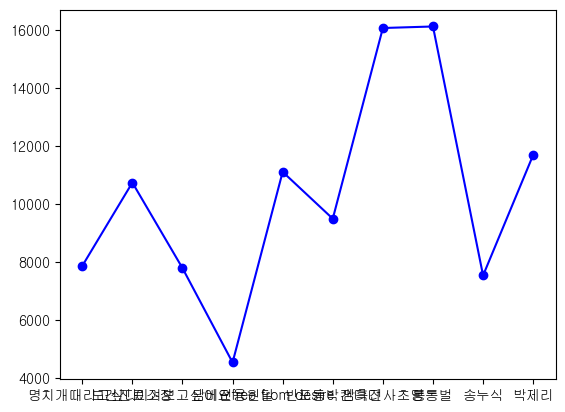

In [108]:
plt.plot(damage, color = 'blue', marker = 'o')

In [107]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

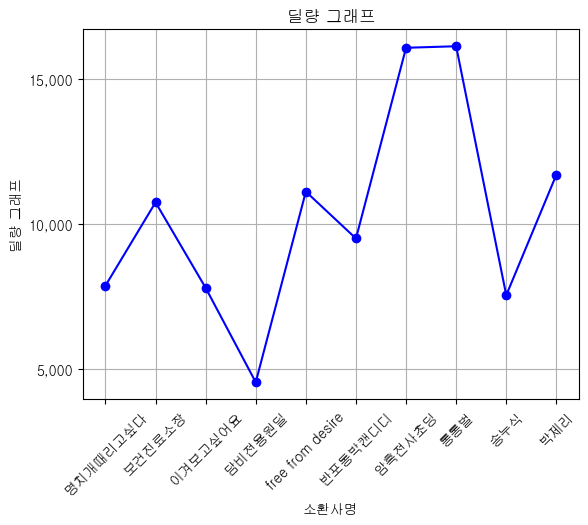

In [123]:
yticks_interval = 5000
maxlim = int((damage.max() / yticks_interval + 1)) * yticks_interval
values = np.arange(0, maxlim + 1, yticks_interval)
plt.yticks(values, ['%s' %format(val, ',') for val in values])

plt.grid(True)
plt.title('딜량 그래프')
plt.xlabel('소환사명')
plt.ylabel('딜량 그래프')

plt.xticks(rotation = 45)
plt.plot(damage, color = 'blue', marker = 'o')

In [113]:
tmp_df = df[['TEAMPOSITION', 'TOTALDAMAGEDEALTTOCHAMPIONS', 'TOTALDAMAGETAKEN', 'G15']]

In [114]:
tmp_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G15
0,JUNGLE,7862,26255,5338
1,MIDDLE,10736,13777,4407
2,BOTTOM,7787,13141,3749
3,UTILITY,4532,13599,4569
4,TOP,12554,9278,6800
...,...,...,...,...
10015,UTILITY,16848,14972,5018
10016,TOP,22771,25577,6800
10017,JUNGLE,11124,20147,4778
10018,MIDDLE,11985,27136,5264


In [117]:
values = np.arange(0, maxlim + 1, yticks_interval)

In [120]:
damage.max()

16120

In [124]:
tmp_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G15
0,JUNGLE,7862,26255,5338
1,MIDDLE,10736,13777,4407
2,BOTTOM,7787,13141,3749
3,UTILITY,4532,13599,4569
4,TOP,12554,9278,6800
...,...,...,...,...
10015,UTILITY,16848,14972,5018
10016,TOP,22771,25577,6800
10017,JUNGLE,11124,20147,4778
10018,MIDDLE,11985,27136,5264


In [125]:
tmp_df = tmp_df[~tmp_df.TEAMPOSITION.isna()] # na값 제거(결측값 제거)

In [126]:
tmp_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G15
0,JUNGLE,7862,26255,5338
1,MIDDLE,10736,13777,4407
2,BOTTOM,7787,13141,3749
3,UTILITY,4532,13599,4569
4,TOP,12554,9278,6800
...,...,...,...,...
10015,UTILITY,16848,14972,5018
10016,TOP,22771,25577,6800
10017,JUNGLE,11124,20147,4778
10018,MIDDLE,11985,27136,5264


In [127]:
my_tmp = tmp_df[tmp_df.TEAMPOSITION == 'JUNGLE']
my_tmp

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G15
0,JUNGLE,7862,26255,5338
5,JUNGLE,2547,9576,4337
10,JUNGLE,3078,11035,4048
15,JUNGLE,12464,30471,3944
20,JUNGLE,17990,24083,6735
...,...,...,...,...
9997,JUNGLE,5860,20131,3926
10002,JUNGLE,30028,26877,7453
10007,JUNGLE,11461,38959,4188
10012,JUNGLE,10758,25453,5020


In [129]:
xdata = my_tmp.G15
ydata = my_tmp.TOTALDAMAGEDEALTTOCHAMPIONS

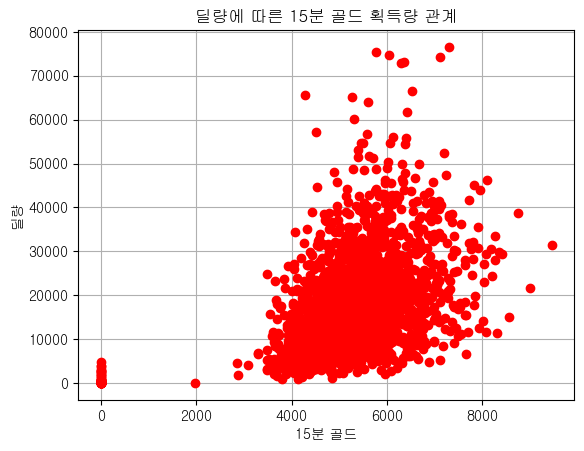

In [130]:
# 산점도 그래프 그리기
plt.figure()
plt.plot(xdata, ydata, color = 'r', marker = 'o', linestyle = 'None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('딜량에 따른 15분 골드 획득량 관계')
plt.grid(True)

In [131]:
ydata2 = my_tmp.TOTALDAMAGETAKEN

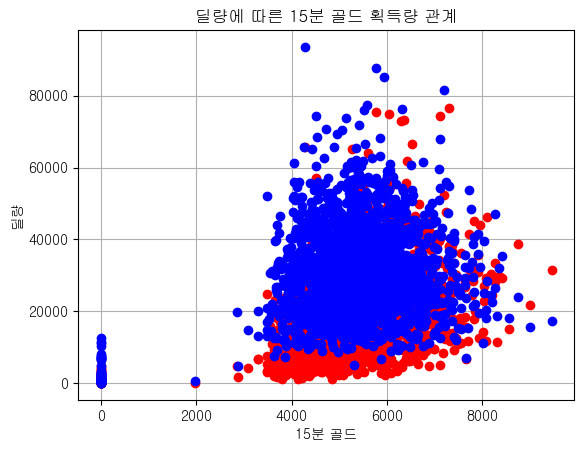

In [132]:
# 산점도 그래프 그리기
plt.figure()
plt.plot(xdata, ydata, color = 'r', marker = 'o', linestyle = 'None')
plt.plot(xdata, ydata2, color = 'b', marker = 'o', linestyle = 'None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('딜량에 따른 15분 골드 획득량 관계')
plt.grid(True)

In [212]:
group_df2 = tmp_df.groupby(['TEAMPOSITION']).mean().round()

In [213]:
group_df2

,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G15
TEAMPOSITION,,,
BOTTOM,20765.0,19121.0,5245.0
JUNGLE,17599.0,30126.0,5232.0
MIDDLE,20368.0,22266.0,4944.0
TOP,19729.0,26860.0,4907.0
UTILITY,11199.0,17449.0,3825.0


In [214]:
group_df2.reset_index(inplace= True)

In [210]:
group_df2 = group_df2.reset_index()

In [215]:
group_df2.columns

Index(['TEAMPOSITION', 'TOTALDAMAGEDEALTTOCHAMPIONS', 'TOTALDAMAGETAKEN',
       'G15'],
      dtype='object')

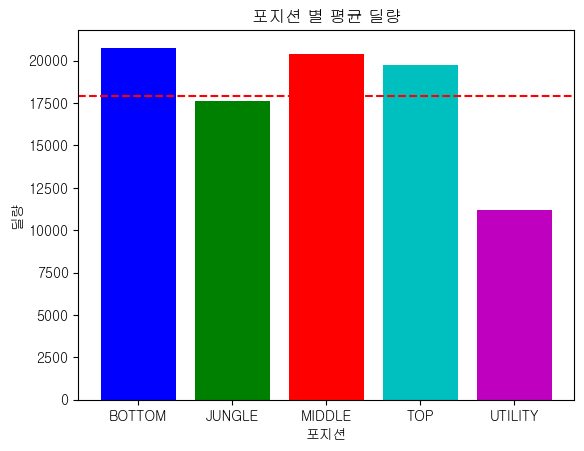

In [218]:
plt.figure()
plt.bar(group_df2.TEAMPOSITION, group_df2.TOTALDAMAGEDEALTTOCHAMPIONS, color = ['b', 'g', 'r', 'c', 'm'])
plt.xlabel('포지션')
plt.ylabel('딜량')
plt.title('포지션 별 평균 딜량')

mean_val = group_df2.TOTALDAMAGEDEALTTOCHAMPIONS.mean()
plt.axhline(y = mean_val, color = 'r', linestyle = 'dashed')

In [160]:
tmp_df.columns

Index(['TEAMPOSITION', 'TOTALDAMAGEDEALTTOCHAMPIONS', 'TOTALDAMAGETAKEN',
       'G15'],
      dtype='object')

In [161]:
group_df.loc[0]

KeyError: 0

In [162]:
group_df.set_index('TEAMPOSITION', inplace = True)

KeyError: "None of ['TEAMPOSITION'] are in the columns"

Text(0.5, 1.0, '파이 차트')

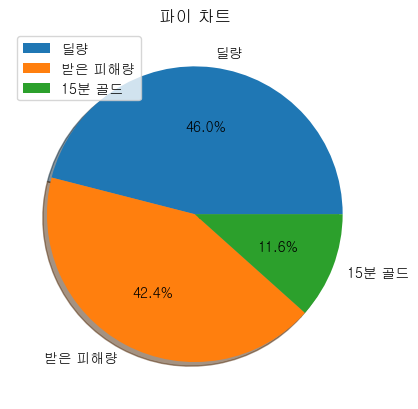

In [168]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['딜량', '받은 피해량', '15분 골드'], shadow = True, autopct = '%1.1f%%', explode = (0, 0, 0))
plt.grid(True)
plt.legend(loc = 2)
plt.title('파이 차트')